# Character Model Analysis

In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
%matplotlib inline

def plot_files(files):
    offsets = [1] * len(files)

    labels_and_results = []
    color_map = list(mcolors.TABLEAU_COLORS.keys())

    for (label, file) in files:
        with open(file, 'r') as f:
            result = json.load(f)
            labels_and_results.append((label, result))


    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

    for i in range(len(files)):
        label = labels_and_results[i][0]
        result = labels_and_results[i][1]

        num_data_points = len(result['elapsed_times'])
        epoch_start = offsets[i]
        epoch_range = list(range(epoch_start, epoch_start + num_data_points))

        axs[0].plot(epoch_range, result['dev_losses'], color_map[i], linestyle='--', label=label + '_dev')
        axs[0].plot(epoch_range, result['train_losses'], color_map[i], label=label + '_train')

        axs[1].plot(epoch_range, result['dev_accu_pcts'], color_map[i], linestyle='--')
        axs[1].plot(epoch_range, result['train_accu_pcts'], color_map[i])

    axs[0].set_title('Epoch vs Loss')
    axs[1].set_title('Epoch vs Accuracy')
    axs[0].xaxis.set_major_locator(mticker.MultipleLocator(5))
    #axs[0].set_ylim(ymin = 0.0, ymax=4.0)
    axs[1].xaxis.set_major_locator(mticker.MultipleLocator(5))
    #axs[1].set_ylim(ymin = 0.0, ymax=1.0)
    fig.legend(bbox_to_anchor=(1.0, 1), loc="upper left")

Let's just try a few networks
```
python trainer/task.py --batch-size 64 --num-epochs 25 --device cpu --learning-rate 0.001 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 64 --hidden-depth=1 --output-folder char-rnn-64-1
python trainer/task.py --batch-size 64 --num-epochs 25 --device cpu --learning-rate 0.001 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 128 --hidden-depth=1 --output-folder char-rnn-128-1
python trainer/task.py --batch-size 64 --num-epochs 25 --device cpu --learning-rate 0.001 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 256 --hidden-depth=1 --output-folder char-rnn-256-1
python trainer/task.py --batch-size 64 --num-epochs 25 --device cpu --learning-rate 0.001 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 512 --hidden-depth=1 --output-folder char-rnn-512-1
python trainer/task.py --batch-size 64 --num-epochs 25 --device cpu --learning-rate 0.001 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 1024 --hidden-depth=1 --output-folder char-rnn-1024-1
python trainer/task.py --batch-size 64 --num-epochs 25 --device cpu --learning-rate 0.001 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 2048 --hidden-depth=1 --output-folder char-rnn-2048-1
```
```
python trainer/task.py --batch-size 512 --num-epochs 25 --device mps --learning-rate 0.001 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 4096 --hidden-depth=1 --output-folder char-rnn-4096-1
```

```
python task.py --batch-size 64 --num-epochs 50 --device mps --learning-rate 0.002 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 1024 --hidden-depth=1 --output-folder lstm-1024
```

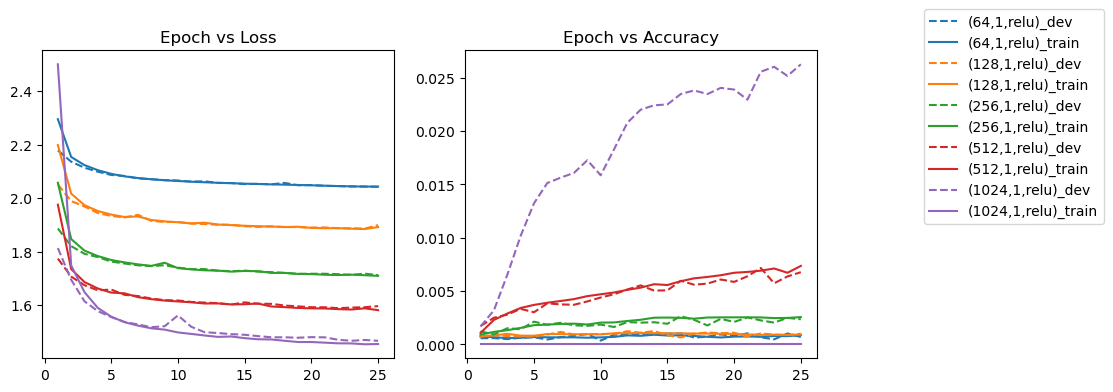

In [84]:
files = [
    ('(64,1,relu)', 'training_results/char-rnn-64-1/training-results.json'), # duplicates, 10 length max
    ('(128,1,relu)', 'training_results/char-rnn-128-1/training-results.json'), # duplicates, 10 length max
    ('(256,1,relu)', 'training_results/char-rnn-256-1/training-results.json'), # duplicates, 10 length max
    ('(512,1,relu)', 'training_results/char-rnn-512-1/training-results.json'), # duplicates, 10 length max
    ('(1024,1,relu)', 'training_results/char-rnn-1024-1/training-results.json'), # duplicates, 10 length max
]
plot_files(files)

These are promising - as the model size increases the loss seems to decrease pretty consistently. Let's try out `tanh` instead of `relu`

#('(512,1,LSTM)', 'training_results/lstm/training-results.json'), # duplicates, 10 length max
    #('(1024,1,LSTM)', 'training_results/lstm-1024/training-results.json'), # duplicates, 10 length max
    #('(1024,1,LSTM) - answer loss', 'training_results/lstm-1024-answer-loss/training-results.json'), # duplicates, 10 length max - batch size 256
    #('(2048,1,LSTM)', 'training_results/lstm-2048/training-results.json'), # duplicates, 10 length max
    

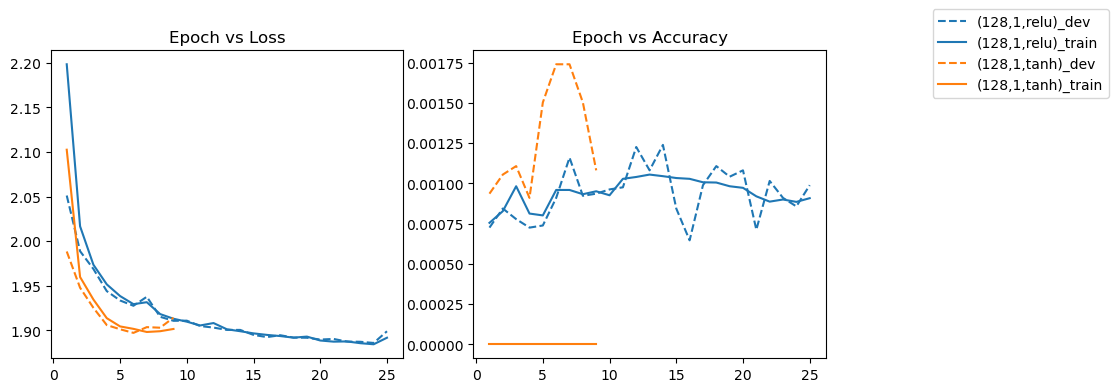

In [85]:
files = [
    ('(128,1,relu)', 'training_results/char-rnn-128-1/training-results.json'), # duplicates, 10 length max
    ('(128,1,tanh)', 'training_results/char-rnn-128-1-tanh/training-results.json'), # duplicates, 10 length max (0.002 LR)
]
plot_files(files)

Seems like tanh may be performing slightly better. Let's see the impact of adding layers:

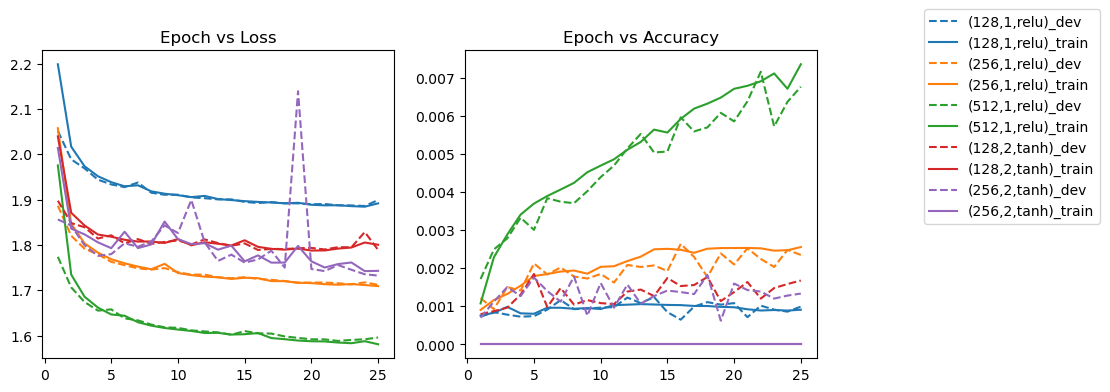

In [87]:
files = [
    ('(128,1,relu)', 'training_results/char-rnn-128-1/training-results.json'), # duplicates, 10 length max
    ('(256,1,relu)', 'training_results/char-rnn-256-1/training-results.json'), # duplicates, 10 length max
    ('(512,1,relu)', 'training_results/char-rnn-512-1/training-results.json'), # duplicates, 10 length max
    ('(128,2,tanh)', 'training_results/char-rnn-128-2-tanh/training-results.json'), # duplicates, 10 length max (0.002 LR)
    ('(256,2,tanh)', 'training_results/char-rnn-256-2-tanh/training-results.json'), # duplicates, 10 length max (0.002 LR)
]
plot_files(files)

Seems like adding a layer is less effective than increasing the network width. Let's try with an LSTM.

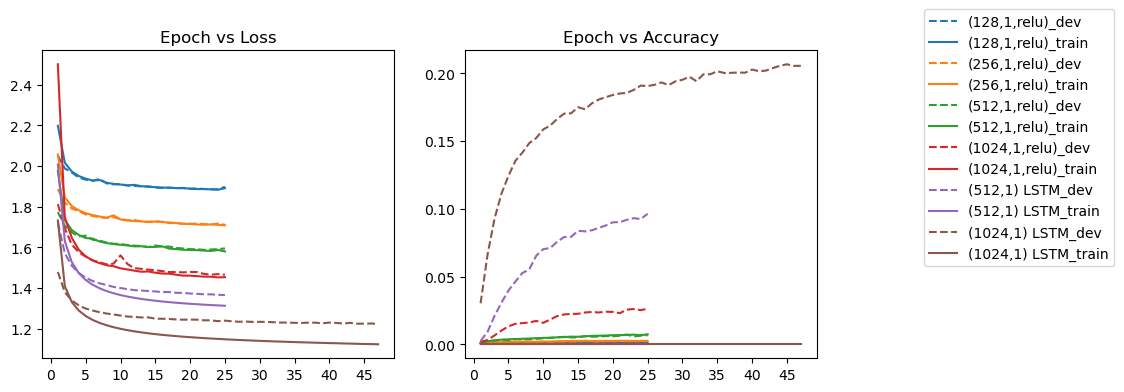

In [95]:
files = [
    ('(128,1,relu)', 'training_results/char-rnn-128-1/training-results.json'), # duplicates, 10 length max
    ('(256,1,relu)', 'training_results/char-rnn-256-1/training-results.json'), # duplicates, 10 length max
    ('(512,1,relu)', 'training_results/char-rnn-512-1/training-results.json'), # duplicates, 10 length max
    ('(1024,1,relu)', 'training_results/char-rnn-1024-1/training-results.json'), # duplicates, 10 length max
    ('(512,1) LSTM', 'training_results/lstm/training-results.json'), # duplicates, 10 length max
    ('(1024,1) LSTM', 'training_results/lstm-1024/training-results.json'), # duplicates, 10 length max
]
plot_files(files)

The LSTM performs significantly better, let's try some bigeer networks:

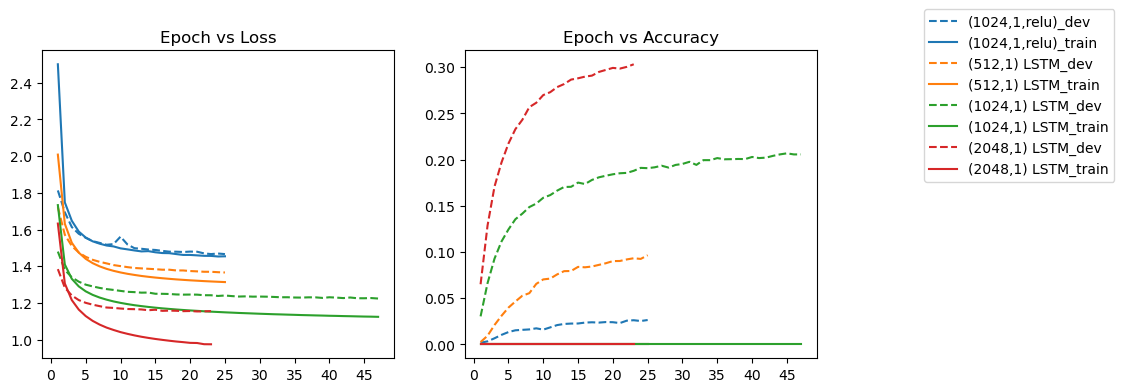

In [96]:
files = [
    ('(1024,1,relu)', 'training_results/char-rnn-1024-1/training-results.json'), # duplicates, 10 length max
    ('(512,1) LSTM', 'training_results/lstm/training-results.json'), # duplicates, 10 length max
    ('(1024,1) LSTM', 'training_results/lstm-1024/training-results.json'), # duplicates, 10 length max
    ('(2048,1) LSTM', 'training_results/lstm-2048/training-results.json'), # duplicates, 10 length max
]
plot_files(files)

These networks perform quite well even when scaling up.

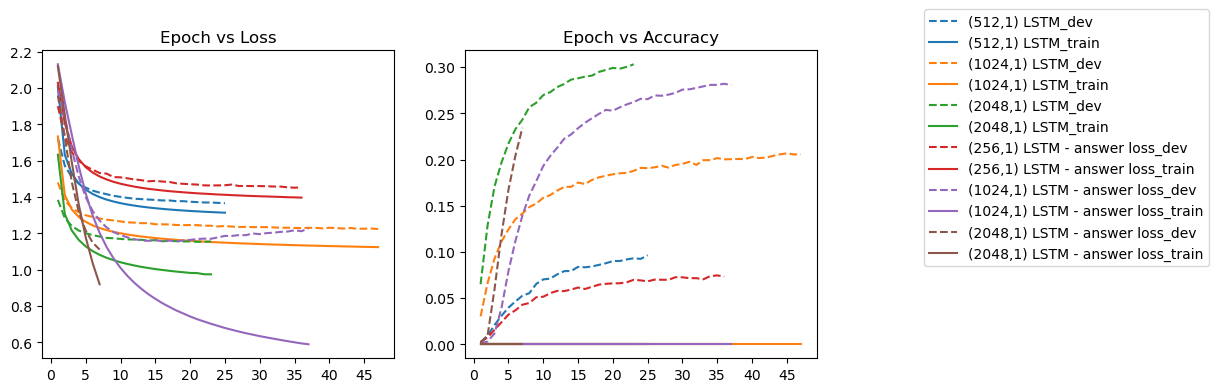

In [99]:
files = [
    ('(512,1) LSTM', 'training_results/lstm/training-results.json'), # duplicates, 10 length max
    ('(1024,1) LSTM', 'training_results/lstm-1024/training-results.json'), # duplicates, 10 length max
    ('(2048,1) LSTM', 'training_results/lstm-2048/training-results.json'), # duplicates, 10 length max

    ('(256,1) LSTM - answer loss', 'training_results/char-lstm-256-1-answer-loss/training-results.json'), # duplicates, 10 length max
    ('(1024,1) LSTM - answer loss', 'training_results/lstm-1024-answer-loss/training-results.json'), # duplicates, 10 length max
    ('(2048,1) LSTM - answer loss', 'training_results/lstm-2048-answer-loss/training-results.json'), # duplicates, 10 length max
]
plot_files(files)

# training_results/lstm-4096-answer-loss

Seems like only including the answer is useful.

## Sampling
Let's try sampling from our model:

In [51]:
import torch
from argparse import Namespace
import trainer.crossword.trainer

args = Namespace(hidden_layer_size=512, embedding_dimensions=100, hidden_depth=1)
train_dataset, test_dataset, dev_dataset, dataset = trainer.crossword.trainer.load_dataset()
model, collate_batch, vocab = trainer.crossword.trainer.build_character_model(dataset=dataset, device='cpu', args=args)

model_path = 'training_results/lstm-2048/model-full-epoch-4.pt'
model = torch.load(model_path)
model = model.to('cpu')


len(dataset)=758874
len(train_dataset)=607099
len(test_dataset)=75888
len(dev_dataset)=75887
max_answer_length=22
len(vocab)=91
vocab.get_itos()=['<PAD>', '<BOC>', '<EOC>', '<EOA>', '<1>', '<2>', '<3>', '<4>', '<5>', '<6>', '<7>', '<8>', '<9>', '<10>', '<11>', '<12>', '<13>', '<14>', '<15>', '<16>', '<17>', '<18>', '<19>', '<20>', '<21>', '<22>', 'e', ' ', 'a', 'o', 't', 's', 'r', 'i', 'n', 'l', 'd', 'c', 'h', 'm', 'p', 'u', 'g', 'f', 'b', 'y', 'w', 'k', '_', '"', 'v', '.', ',', "'", '-', 'x', 'j', 'z', '?', '1', 'q', '9', '0', ')', '(', ':', '!', '2', '8', '6', '5', '7', '4', '3', '/', '&', '#', '*', '+', '%', '$', '=', '@', '<', ';', '>', '}', '[', '\\', '^', '{']


In [58]:
import torch.nn.functional as F

sample_clue = 'kind of network'
sample_answer_length = 6

model.eval()
with torch.no_grad():
    tokens = ['<BOC>']
    tokens.extend(list(sample_clue))
    tokens.append('<EOC>')
    tokens.append('<' + str(sample_answer_length) + '>')
    print(tokens)
    i_tokens = vocab(tokens)
    print(i_tokens)

    hidden = None
    cells = None
    for token, i_token in zip(tokens, i_tokens):
        print(token, i_token, end=' --> ')
        one_hots = F.one_hot(torch.tensor(i_token), len(vocab)).float()
        outputs, hidden = model(one_hots.unsqueeze(0), hidden)
        output_i = outputs.argmax(1)
        print(vocab.get_itos()[output_i.item()], output_i.item())

    predicted_answer = vocab.get_itos()[output_i.item()]
    print('-' * 30)
    print('Starting model takeover')
    print('-' * 30)
    for i in range(sample_answer_length):
        token = vocab.get_itos()[output_i.item()]
        i_token = output_i.item()
        print(token, i_token, end=' --> ')
        one_hots = F.one_hot(torch.tensor(i_token), len(vocab)).float()
        outputs, hidden = model(one_hots.unsqueeze(0), hidden)
        output_i = outputs.argmax(1)
        print(vocab.get_itos()[output_i.item()], output_i.item())
        predicted_answer += vocab.get_itos()[output_i.item()]

    print(f'Predicted answer: {predicted_answer}')


['<BOC>', 'k', 'i', 'n', 'd', ' ', 'o', 'f', ' ', 'n', 'e', 't', 'w', 'o', 'r', 'k', '<EOC>', '<6>']
[1, 47, 33, 34, 36, 27, 29, 43, 27, 34, 26, 30, 46, 29, 32, 47, 2, 9]
<BOC> 1 --> s 31
k 47 --> i 33
i 33 --> n 34
n 34 --> d 36
d 36 -->   27
  27 --> o 29
o 29 --> f 43
f 43 -->   27
  27 --> c 37
n 34 --> u 41
e 26 --> t 30
t 30 --> w 46
w 46 --> o 29
o 29 --> r 32
r 32 --> k 47
k 47 --> <EOC> 2
<EOC> 2 --> <6> 9
<6> 9 --> n 34
------------------------------
Starting model takeover
------------------------------
n 34 --> e 26
e 26 --> u 41
u 41 --> r 32
r 32 --> a 28
a 28 --> l 35
l 35 --> <EOA> 3
Predicted answer: neural<EOA>
